# Bangladeshi People's Election (2026) Pulse Survey: An Exploratory Data Analysis

## Introduction

**Data Source and Context**
This notebook performs an exploratory data analysis (EDA) on the "People's Election Pulse: Feb-March, 2025" survey dataset, based on a [report](https://innovision-bd.com/wp-content/uploads/2025/03/250313_Innovision-National-Poll__English_Official.pdf) by Innovision Consulting Private Limited. The survey collected responses from 


10,696 potential voters/responders for the survey across all eight divisions of Bangladesh, stratified by rural and urban locations

![Bangladesh Election Commision](https://images.seeklogo.com/logo-png/52/1/bangladesh-election-commission-logo-png_seeklogo-523308.png)
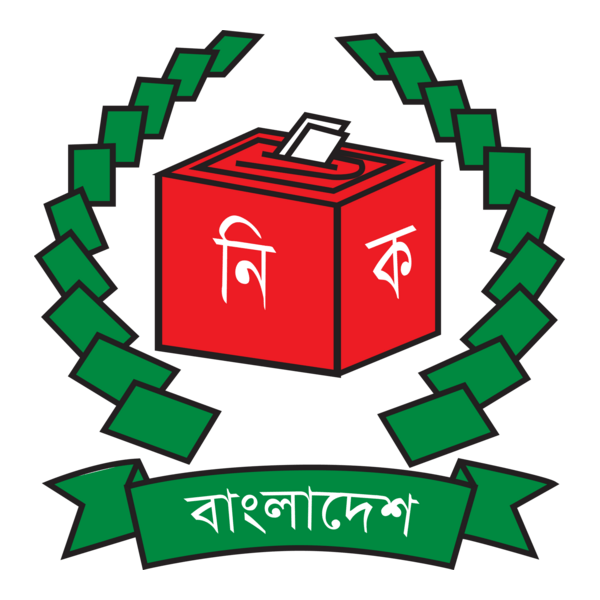
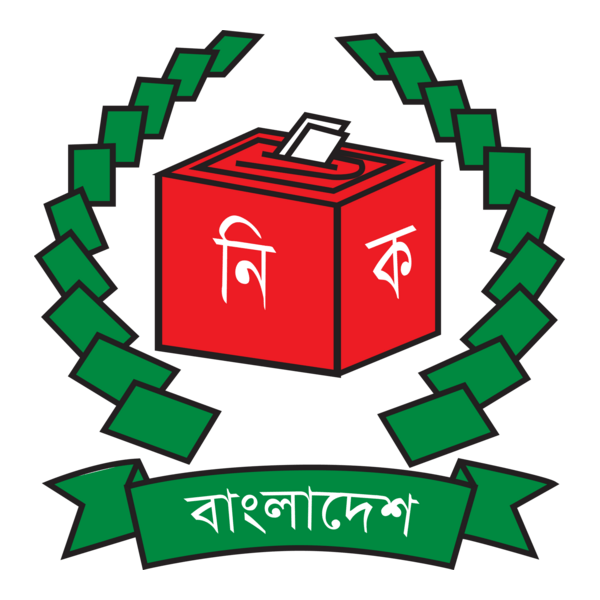
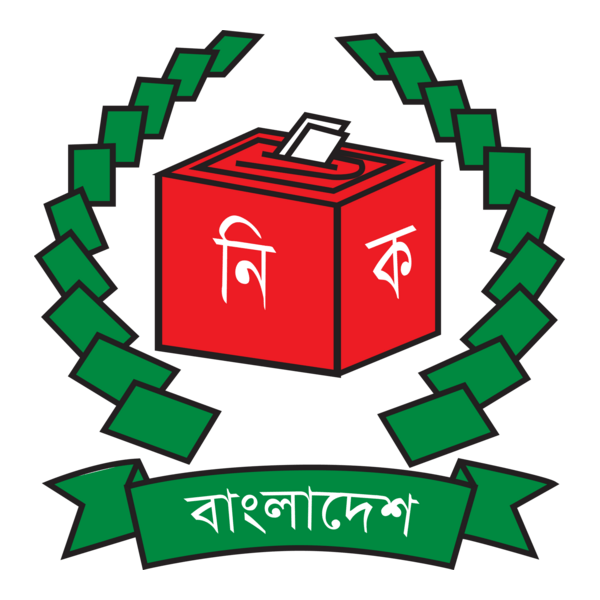
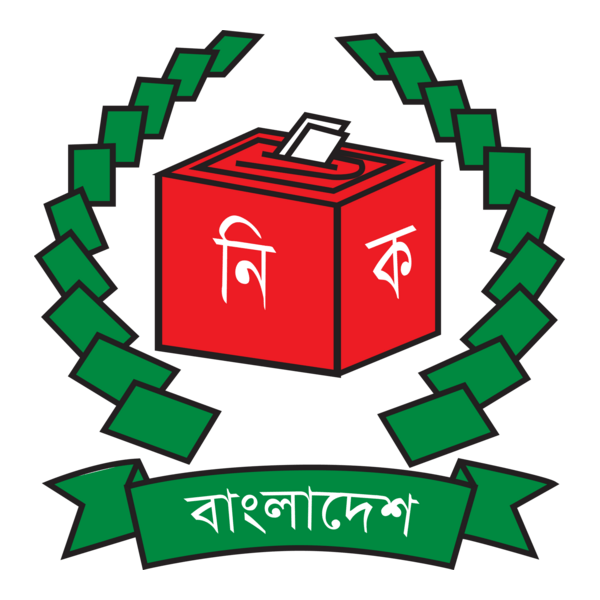
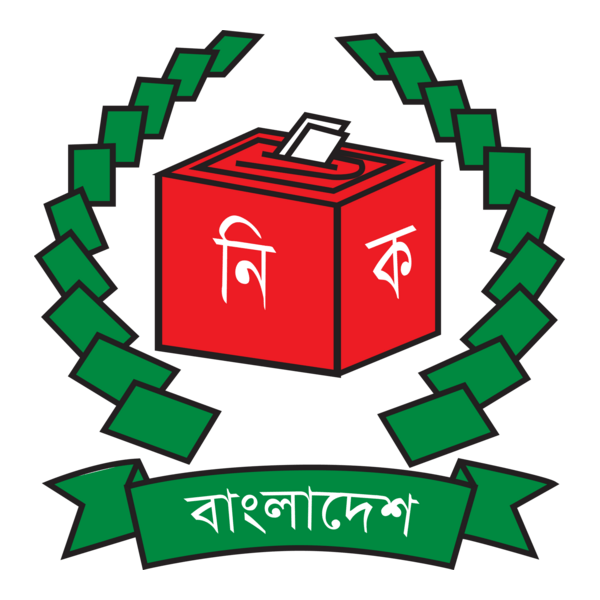
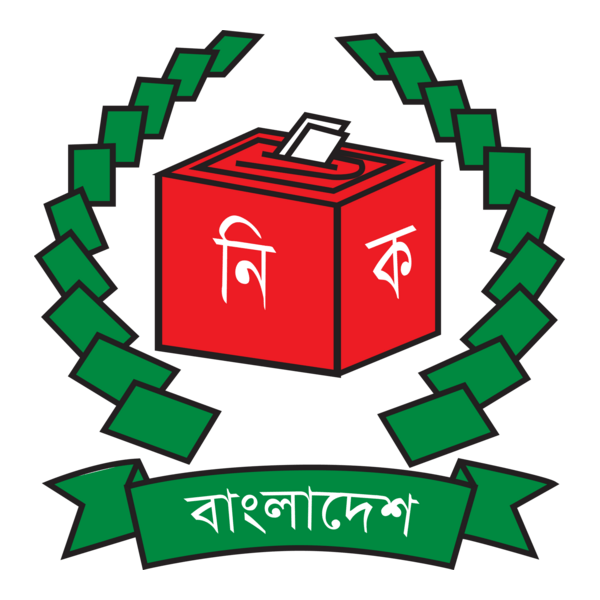

## Project Goal
The survey delves into public opinion on the interim government's performance, expectations from the future government, voting preferences, and the factors influencing voters' decisions.

Our goal is to use Python's data analysis libraries—Pandas, Matplotlib, and Seaborn—to process this data, generate insightful visualizations, and build a clear, data-driven narrative of the political landscape in Bangladesh ahead of the upcoming election.

## 1. Importing Libraries & Setup

We begin by importing the necessary Python libraries for data manipulation (pandas, numpy) and visualization (matplotlib, seaborn). We also set a consistent 'ggplot' style and a default color palette for our plots to ensure they are clean, readable, and visually appealing throughout the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
# Set style for better-looking plots
plt.style.use('ggplot')
sns.set(font_scale=1.2)

## 2. Data Loading

Here, we load all the .csv datasets from the survey. It's crucial to use the correct separator for each file; most use a standard comma, but some (expectations, decision_factors, voting_preferences_by_division) require a semicolon (sep=';'). After loading, we confirm that all datasets are successfully read into pandas DataFrames, ready for analysis.

In [3]:
# --- Load all datasets with the correct separators ---
try:
    # These files are standard comma-separated files
    demographics = pd.read_csv('/kaggle/input/bangladeshi-peoples-election-2026-pulse-survey/Demographic Dataset.csv')
    
    voting_preferences = pd.read_csv('/kaggle/input/bangladeshi-peoples-election-2026-pulse-survey/Voting Preferences Dataset.csv')
    voting_preferences_by_age = pd.read_csv('/kaggle/input/bangladeshi-peoples-election-2026-pulse-survey/Voting Preferences by Age Group Dataset.csv')
    voting_preferences_by_gender_location = pd.read_csv('/kaggle/input/bangladeshi-peoples-election-2026-pulse-survey/Voting Preferences by Gender and Location Dataset.csv')
    voting_preferences_by_division = pd.read_csv('/kaggle/input/bangladeshi-peoples-election-2026-pulse-survey/Voting Preferfences by Division Dataset.csv')
    voter_status = pd.read_csv('/kaggle/input/bangladeshi-peoples-election-2026-pulse-survey/Voter Status Dataset.csv')
    voter_status_by_demographics = pd.read_csv('/kaggle/input/bangladeshi-peoples-election-2026-pulse-survey/Voter Status by Demographics Dataset.csv')
    election_timing_preferences = pd.read_csv('/kaggle/input/bangladeshi-peoples-election-2026-pulse-survey/Election Timing Preferences Dataset.csv')
    previous_vs_current_results = pd.read_csv('/kaggle/input/bangladeshi-peoples-election-2026-pulse-survey/Previous vs Current Results Dataset.csv')
    
    # This file was the one that needed a semicolon separator
    decision_factors = pd.read_csv('/kaggle/input/bangladeshi-peoples-election-2026-pulse-survey/Decision Factors Dataset.csv', sep=';')
    expectations = pd.read_csv('/kaggle/input/bangladeshi-peoples-election-2026-pulse-survey/Expectations Dataset.csv', sep=';')
    
    print("All datasets loaded successfully!")

except FileNotFoundError as e:
    print(e)
    print("\nPlease ensure your Kaggle dataset is correctly added to the notebook's input directory.")

All datasets loaded successfully!


## 3. Demographic Analysis: Who Was Surveyed?

Our first step is to understand the profile of the survey respondents. We analyze the 

demographics dataset to visualize the distribution of respondents by location (71% rural, 29% urban) , 

gender (55% male, 45% female) , 

age group (Gen Z and Millennials make up 70%), and 

geographical division. This provides essential context for all subsequent findings.

In [4]:
# --- Corrected inspection of the Demographics dataset ---
print("\n--- Demographics Dataset ---")
print("First 5 rows:")
print(demographics.head())

print("\nDataset Information:")
demographics.info()


--- Demographics Dataset ---
First 5 rows:
  demographic_category          subcategory  percentage  sample_size
0            Residence                Rural          71         7551
1            Residence                Urban          29         3145
2               Gender                 Male          55         5897
3               Gender               Female          45         4782
4            Age Group  Gen Z (18-28 years)          36         3852

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   demographic_category  23 non-null     object
 1   subcategory           23 non-null     object
 2   percentage            23 non-null     int64 
 3   sample_size           23 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 868.0+ bytes


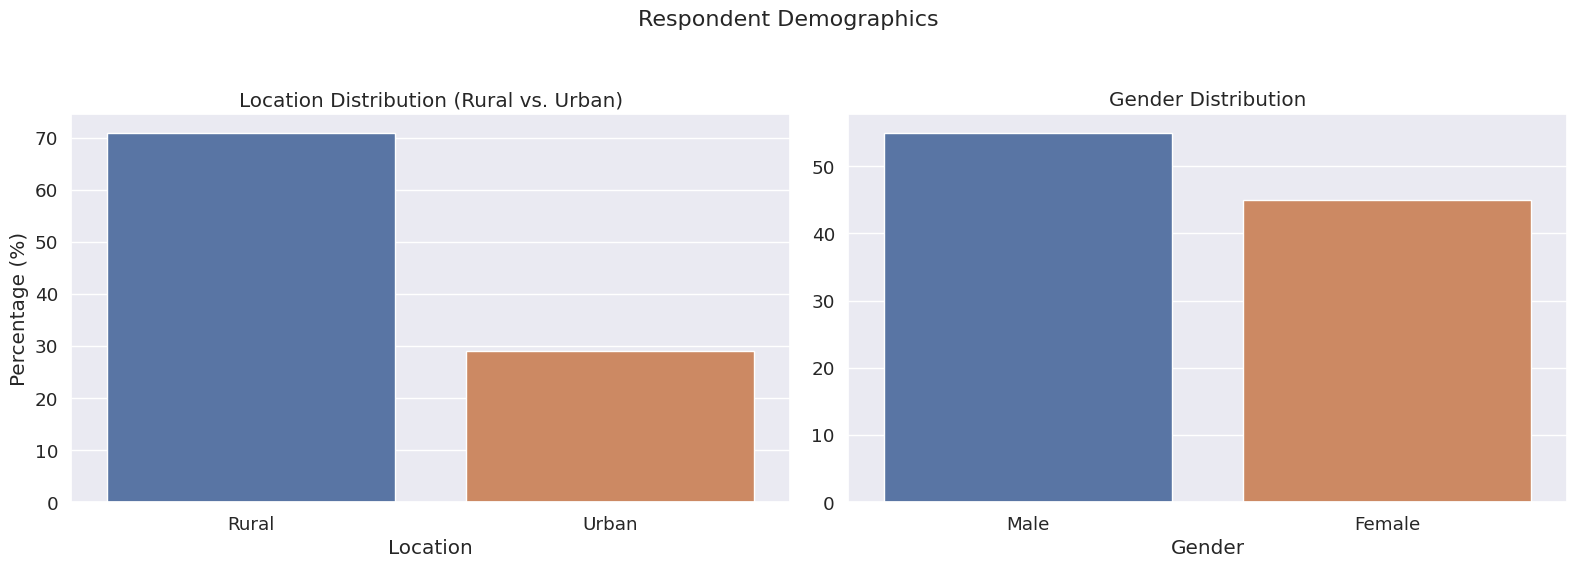

In [5]:
# --- Visualize Gender and Location Distribution ---
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Respondent Demographics', fontsize=16)

# Filter for Residence data
residence_data = demographics[demographics['demographic_category'] == 'Residence']
sns.barplot(x='subcategory', y='percentage', data=residence_data, ax=ax[0])
ax[0].set_title('Location Distribution (Rural vs. Urban)')
ax[0].set_xlabel('Location')
ax[0].set_ylabel('Percentage (%)')

# Filter for Gender data
gender_data = demographics[demographics['demographic_category'] == 'Gender']
sns.barplot(x='subcategory', y='percentage', data=gender_data, ax=ax[1])
ax[1].set_title('Gender Distribution')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('') # Hide y-label for clarity

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Respondent Demographs.png")
plt.show()

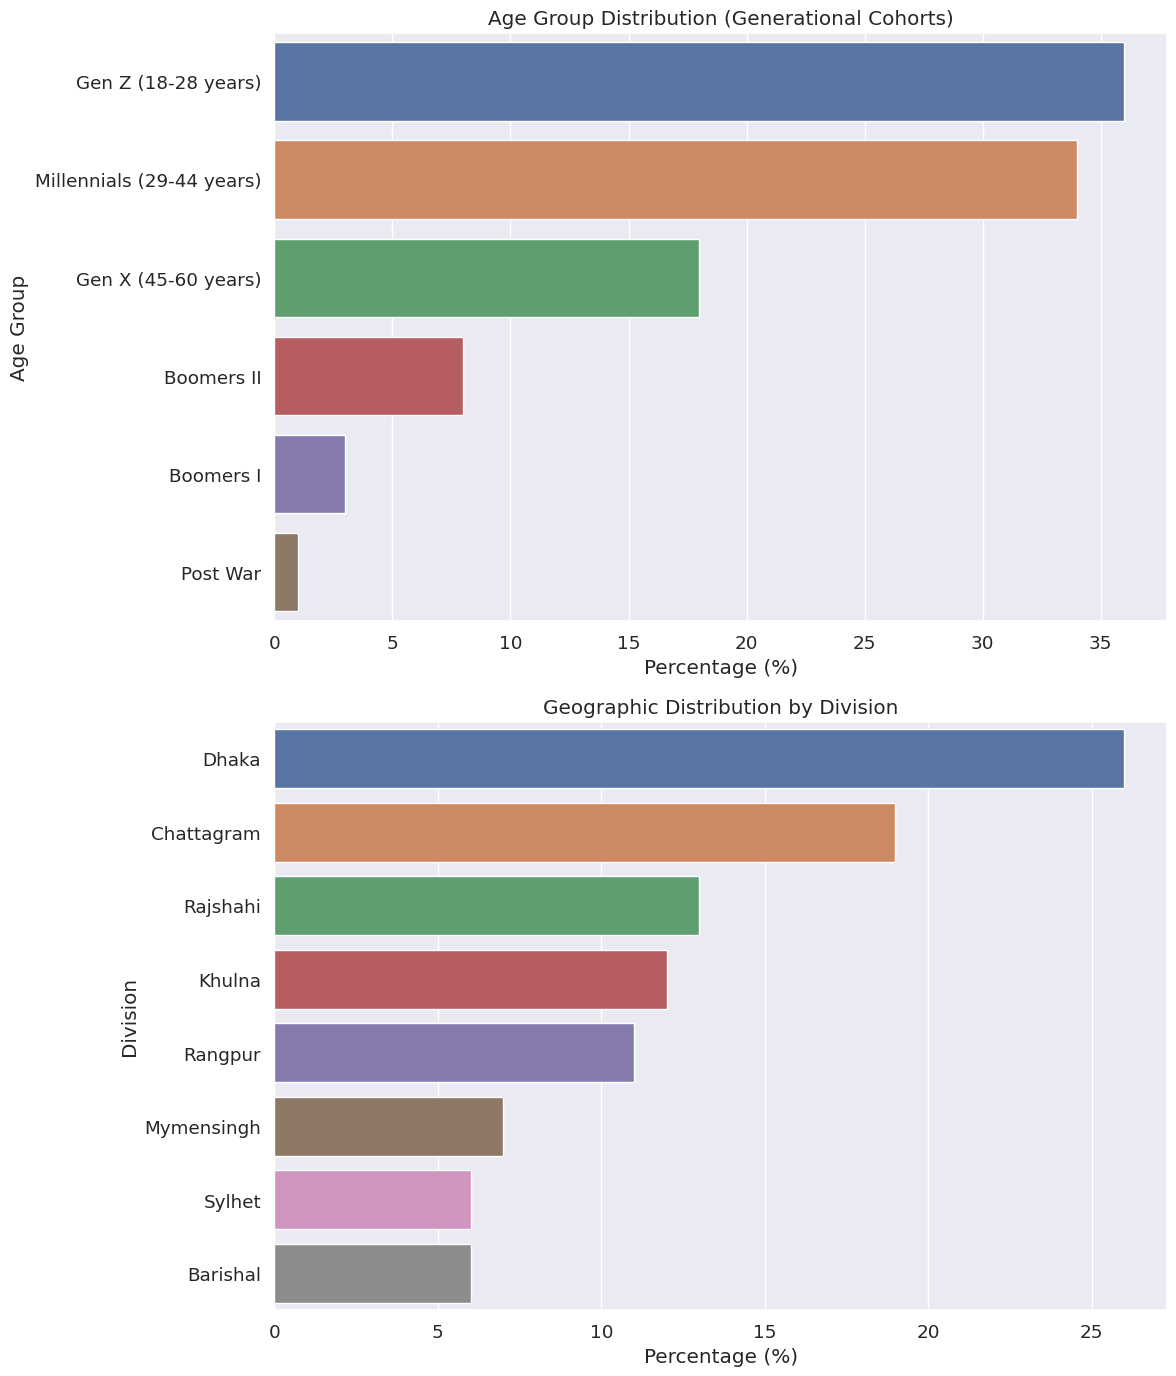

In [6]:
# --- Visualize Age and Division Distribution ---
fig, ax = plt.subplots(2, 1, figsize=(12, 14))

# Filter for Age Group data
age_data = demographics[demographics['demographic_category'] == 'Age Group']
sns.barplot(x='percentage', y='subcategory', data=age_data, ax=ax[0], orient='h')
ax[0].set_title('Age Group Distribution (Generational Cohorts)')
ax[0].set_xlabel('Percentage (%)')
ax[0].set_ylabel('Age Group')

# Filter for Division data
division_data = demographics[demographics['demographic_category'] == 'Division']
sns.barplot(x='percentage', y='subcategory', data=division_data, ax=ax[1], orient='h')
ax[1].set_title('Geographic Distribution by Division')
ax[1].set_xlabel('Percentage (%)')
ax[1].set_ylabel('Division')

plt.tight_layout()
plt.savefig("Age group and division distribution.png")
plt.show()

## 4. Expectations from Government

What do the people want from their government? This analysis visualizes the top priorities citizens have for both the short-term Interim Government and the long-term Future Government. By placing the charts side-by-side, we can easily compare key expectations, revealing that core economic issues like 

**managing price hikes** are paramount for both.




In [7]:

# --- Inspect the Correctly Loaded Expectations Dataset ---
print("--- Expectations Dataset (Correctly Loaded) ---")
print("First 5 rows:")
print(expectations.head())

print("\nDataset Information:")
expectations.info()

--- Expectations Dataset (Correctly Loaded) ---
First 5 rows:
     expectation_type                            expectation  percentage  \
0  Interim Government                     Manage price hikes        69.6   
1  Interim Government                 Improved law and order        45.2   
2  Interim Government                      Employment growth        29.1   
3  Interim Government  Reduced corruption in public services        21.8   
4  Interim Government          Election friendly environment        20.2   

   sample_size  
0        10696  
1        10696  
2        10696  
3        10696  
4        10696  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   expectation_type  31 non-null     object 
 1   expectation       31 non-null     object 
 2   percentage        31 non-null     float64
 3   sample_size    

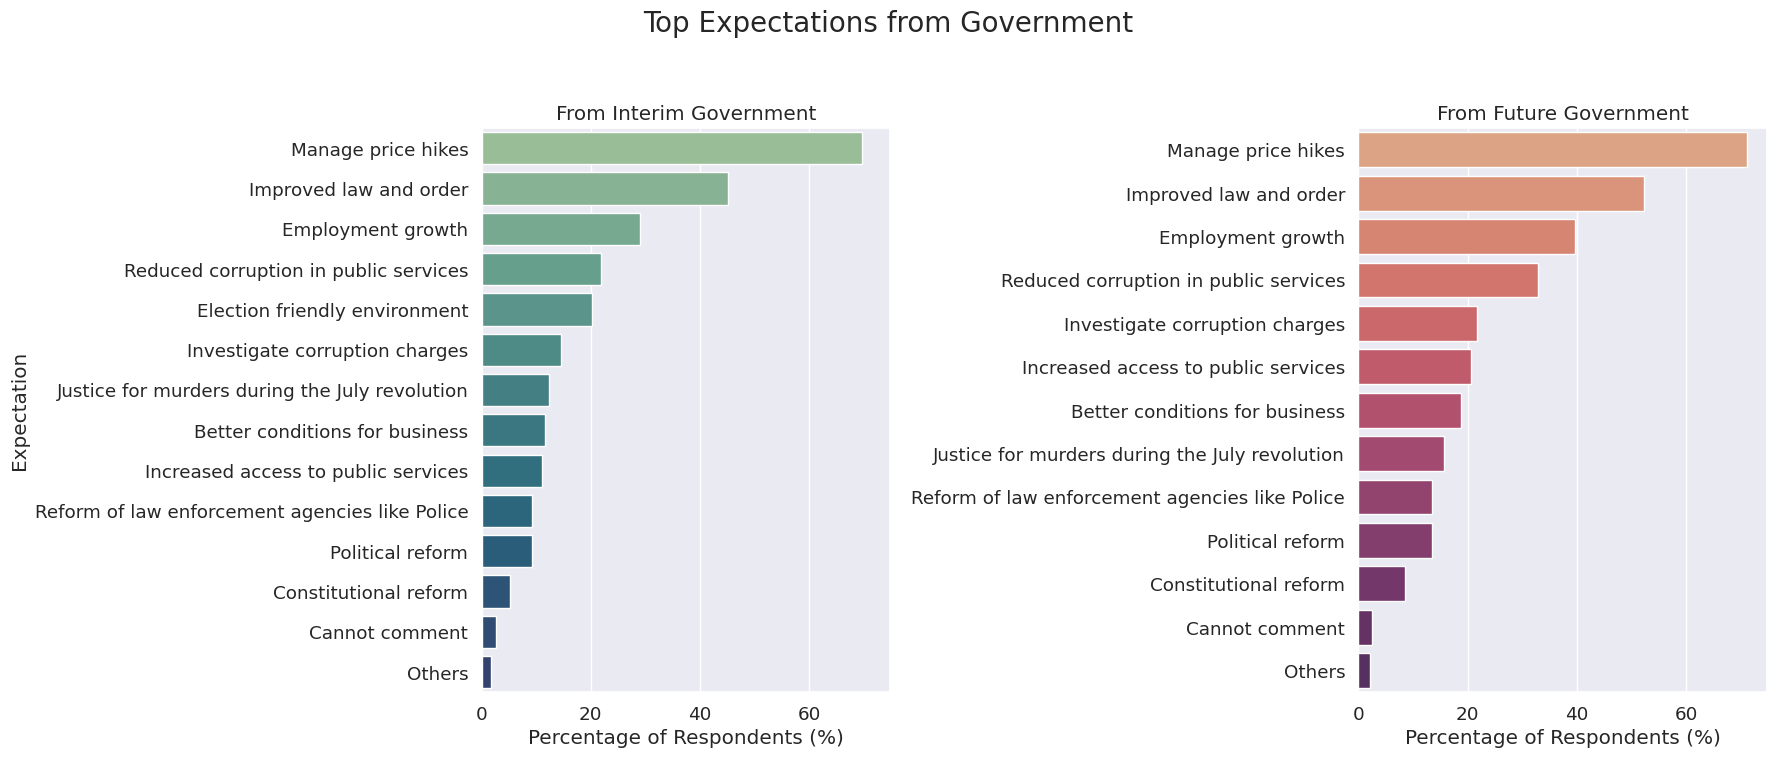

In [8]:
# --- Visualize and Compare Expectations ---

# Filter data for Interim and Future government expectations
# The data uses 'Interim Government' and 'Future Government' in the 'expectation_type' column
ig_expectations = expectations[expectations['expectation_type'] == 'Interim Government'].sort_values('percentage', ascending=False)
future_gov_expectations = expectations[expectations['expectation_type'] == 'Future Government'].sort_values('percentage', ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(18, 8), sharex=True)
fig.suptitle('Top Expectations from Government', fontsize=20)

# Plot for Interim Government
sns.barplot(x='percentage', y='expectation', data=ig_expectations, ax=ax[0], palette='crest')
ax[0].set_title('From Interim Government')
ax[0].set_xlabel('Percentage of Respondents (%)')
ax[0].set_ylabel('Expectation')

# Plot for Future Government
sns.barplot(x='percentage', y='expectation', data=future_gov_expectations, ax=ax[1], palette='flare')
ax[1].set_title('From Future Government')
ax[1].set_xlabel('Percentage of Respondents (%)')
ax[1].set_ylabel('') # Hide y-label

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Top Expectations from Government.png")
plt.show()

## 5. Interim Government Performance Review

This visualization assesses the performance of the Interim Government against the expectations of the people. Using a stacked bar chart, we can clearly see the proportion of citizens who feel their expectations were **'Fully Met', 'Partially Met', or 'Not Met'**. The results highlight significant public dissatisfaction, especially concerning 

**employment growth, where 74.21%** of respondents felt their expectations were not met.

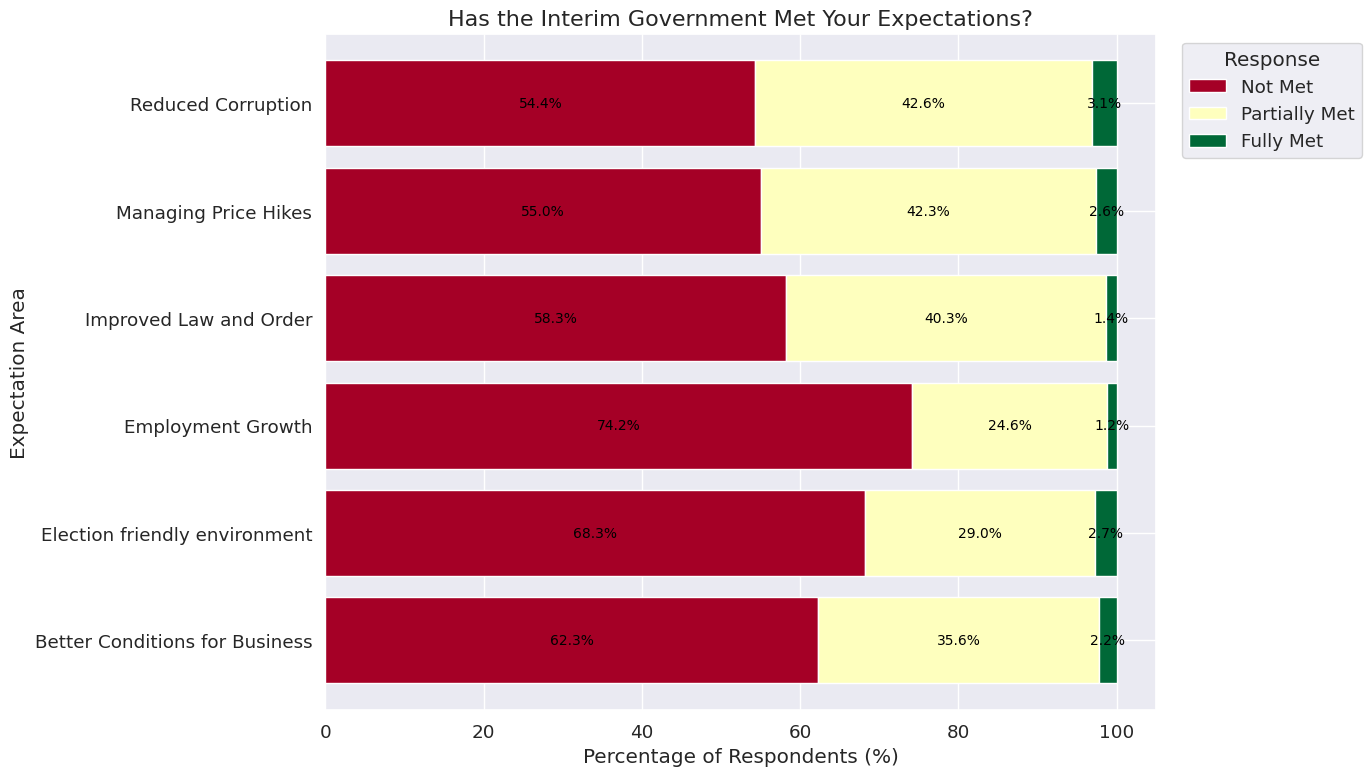

In [9]:
# --- Visualize IG Performance in Meeting Expectations ---

# The performance data is not in the CSV, so we create it manually from Table 2 from the source paper.
performance_data_raw = {
    'Expectation': [
        'Managing Price Hikes', 'Improved Law and Order', 'Employment Growth',
        'Reduced Corruption', 'Election friendly environment', 'Better Conditions for Business'
    ] * 3,
    'Status': ['Fully Met'] * 6 + ['Partially Met'] * 6 + ['Not Met'] * 6,
    'Percentage': [
        2.62, 1.39, 1.15, 3.09, 2.69, 2.15,  # Fully Met percentages
        42.33, 40.33, 24.64, 42.56, 29.05, 35.57, # Partially Met percentages
        55.05, 58.28, 74.21, 54.35, 68.26, 62.28  # Not Met percentages
    ]
}
performance_df = pd.DataFrame(performance_data_raw)

# Pivot the data to prepare for stacking
performance_pivot = performance_df.pivot(index='Expectation', columns='Status', values='Percentage')
performance_pivot = performance_pivot[['Not Met', 'Partially Met', 'Fully Met']] # Reorder for logical visualization

# Plotting the stacked horizontal bar chart
ax = performance_pivot.plot(
    kind='barh',
    stacked=True,
    figsize=(14, 8),
    colormap='RdYlGn', # Red-to-Green shows dissatisfaction-to-satisfaction
    width=0.8
)

ax.set_title('Has the Interim Government Met Your Expectations?', fontsize=16)
ax.set_xlabel('Percentage of Respondents (%)')
ax.set_ylabel('Expectation Area')
ax.legend(title='Response', bbox_to_anchor=(1.02, 1), loc='upper left')

# Add labels inside the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', color='black', fontsize=10)

plt.tight_layout()
plt.savefig("Evaluating the Interim Government's Performance.png")
plt.show()

## 6. Voter Decision Factors
This markdown cell should go above the bar chart of influencing factors.

Why do voters choose a particular party or candidate? This chart explores the primary factors that influence voting decisions, ranking them by importance. The analysis shows that 

Family members (47.1%), local social activities (21.6%) and religion-based politics (20.5%) are the most influential factors, more so than national policies or manifestos.

In [10]:
# The decision_factors DataFrame was already loaded correctly in the previous steps.
# We will inspect it now.
print("--- Decision Factors Dataset ---")
print("First 5 rows:")
print(decision_factors.head())

print("\nDataset Information:")
decision_factors.info()

--- Decision Factors Dataset ---
First 5 rows:
       factor_type                                             factor  \
0  Decision Factor  Social activities of political parties at loca...   
1  Decision Factor                            Religion based politics   
2  Decision Factor                                     Cannot comment   
3  Decision Factor           Election manifestos of political parties   
4  Decision Factor                       Alignment with July movement   

   percentage  sample_size  
0        21.6        10220  
1        20.5        10220  
2        19.2        10220  
3        18.8        10220  
4        16.4        10220  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   factor_type  25 non-null     object 
 1   factor       25 non-null     object 
 2   percentage   25 non-null     float64
 3   s

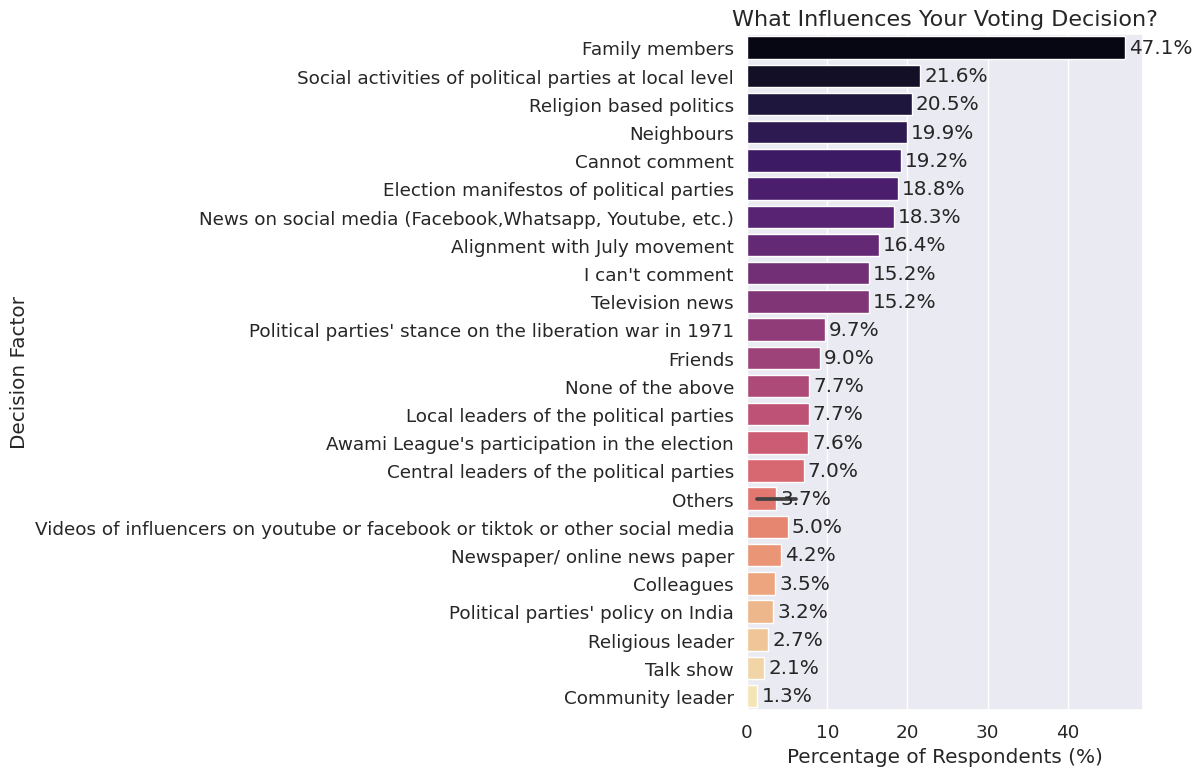

In [11]:
# --- Visualize Influences on Voting Decisions ---

# Sort the data by percentage to create a ranked chart
decision_factors_sorted = decision_factors.sort_values('percentage', ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='percentage', y='factor', data=decision_factors_sorted, palette='magma')

ax.set_title('What Influences Your Voting Decision?', fontsize=16)
ax.set_xlabel('Percentage of Respondents (%)')
ax.set_ylabel('Decision Factor')

# Add percentage labels to the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.savefig("Key Decision Factors.png")
plt.show()

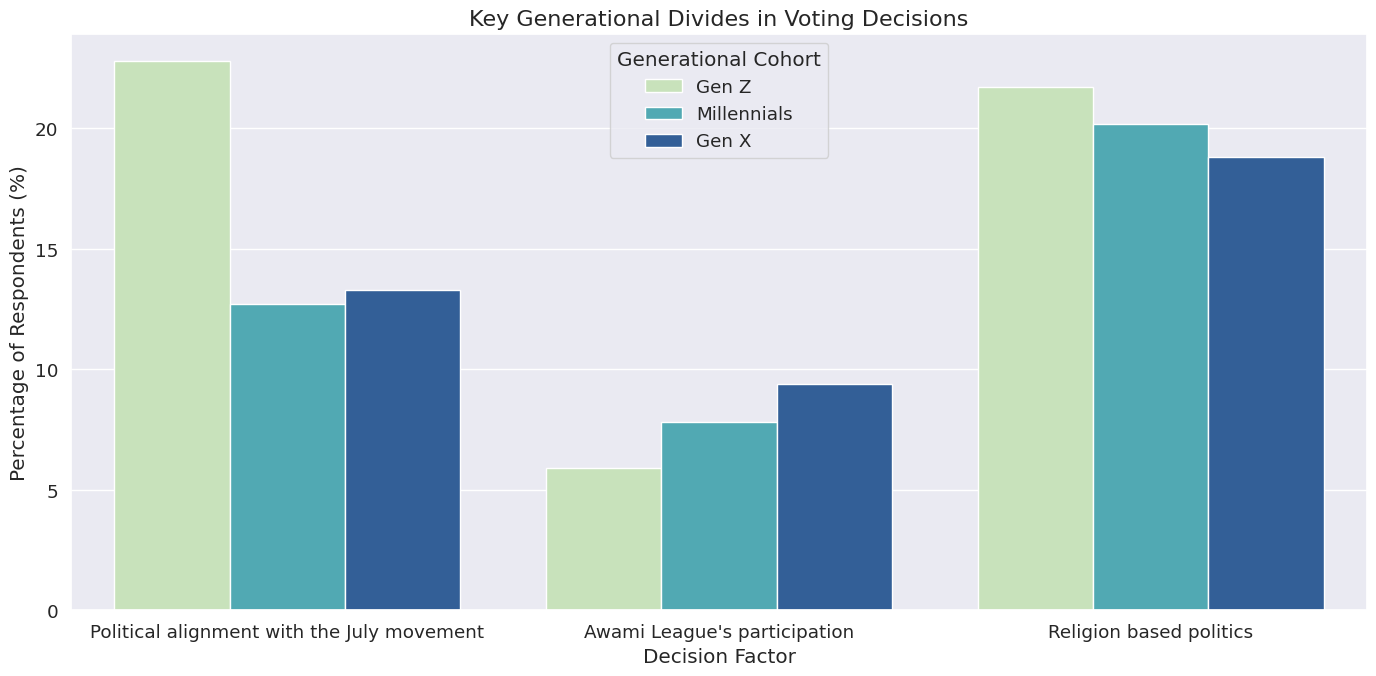

In [12]:
# This data is more complex, so we will manually create the DataFrame based on Table 12 in the source paper.
age_factors_raw = {
    'Generation': ['Gen Z', 'Millennials', 'Gen X', 'Gen Z', 'Millennials', 'Gen X', 'Gen Z', 'Millennials', 'Gen X'],
    'Factor': ['Political alignment with the July movement'] * 3 + ['Awami League\'s participation'] * 3 + ['Religion based politics'] * 3,
    'Percentage': [22.8, 12.7, 13.3, 5.9, 7.8, 9.4, 21.7, 20.2, 18.8]
}
age_factors_df = pd.DataFrame(age_factors_raw)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Factor', y='Percentage', hue='Generation', data=age_factors_df, palette='YlGnBu')

ax.set_title('Key Generational Divides in Voting Decisions', fontsize=16)
ax.set_xlabel('Decision Factor')
ax.set_ylabel('Percentage of Respondents (%)')
plt.legend(title='Generational Cohort')

plt.tight_layout()
plt.savefig("Decision Factors by Age group.png")
plt.show()

## 7. Voter Certainty: Decided vs. Undecided

Here, we gauge the certainty of the electorate. This pie chart provides a top-level view of the proportion of voters who have already 

**decided (62.0%)** who to vote for versus those who are still **undecided (29.4%)**. This highlights the size of the crucial "swing voter" bloc that could determine the election outcome.

In [13]:
print(voter_status.head())

                status_type            status  percentage  sample_size
0              Voter Status     Yes (decided)        62.0        10696
1              Voter Status    No (undecided)        29.4        10696
2              Voter Status  I cannot comment         8.6        10696
3  Voting Preference Status          Revealed        65.7         6631
4  Voting Preference Status      Not revealed        34.3         6631


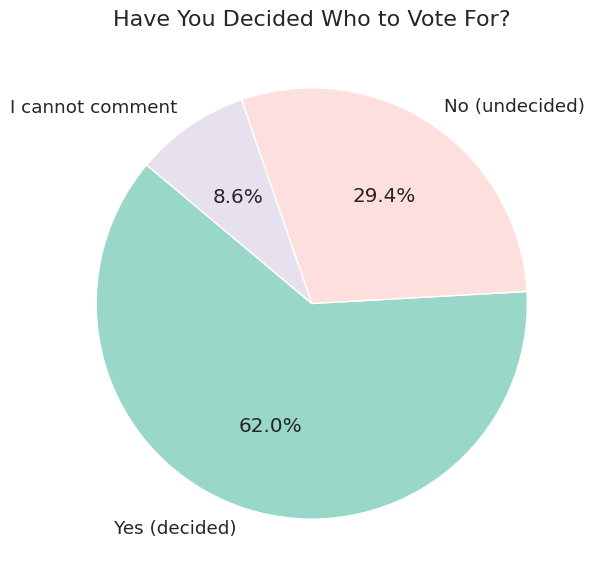

In [14]:
# --- Chart 1: Voter Certainty ---

# Filter the DataFrame to get only the main voter status
voter_certainty_df = voter_status[voter_status['status_type'] == 'Voter Status']

# Create the corrected pie chart
plt.figure(figsize=(10, 7))
plt.pie(
    voter_certainty_df['percentage'],
    labels=voter_certainty_df['status'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#99d8c9', '#fde0dd', '#e7e1ef'] # Softer pastel colors
)
plt.title('Have You Decided Who to Vote For?', fontsize=16)
plt.show()

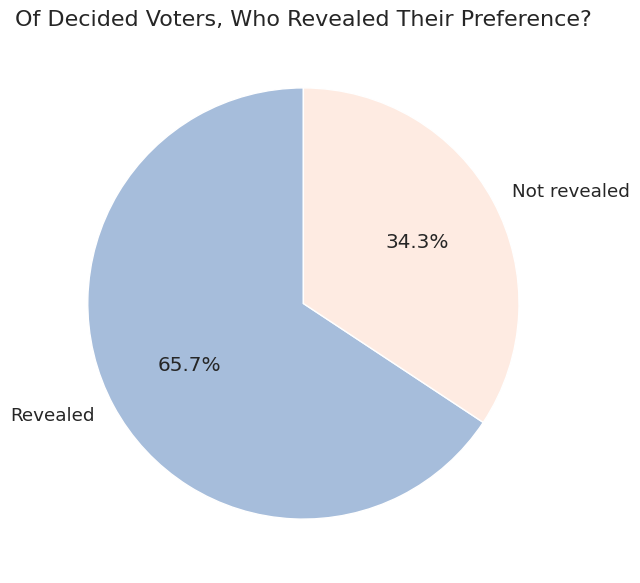

In [15]:
# --- Chart 2: Revealed vs. Unrevealed Voters ---

# Filter the DataFrame for preference status
preference_status_df = voter_status[voter_status['status_type'] == 'Voting Preference Status']

# Create the second pie chart
plt.figure(figsize=(10, 7))
plt.pie(
    preference_status_df['percentage'],
    labels=preference_status_df['status'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#a6bddb', '#feebe2']
)
plt.title('Of Decided Voters, Who Revealed Their Preference?', fontsize=16)
plt.savefig("Revealed vs. Not Revealed Voters.png")
plt.show()

## 8. Profile of the Undecided Voter

We dig deeper into the 29.4% of undecided voters. This analysis breaks down the undecided demographic by 

**location (35% urban vs 27% rural)** and 


**gender (33.77% female vs 25.81% male)**. The primary reason for their indecision is 


uncertainty about the candidates **(49.3%)**. This helps identify the key groups that political parties need to persuade.

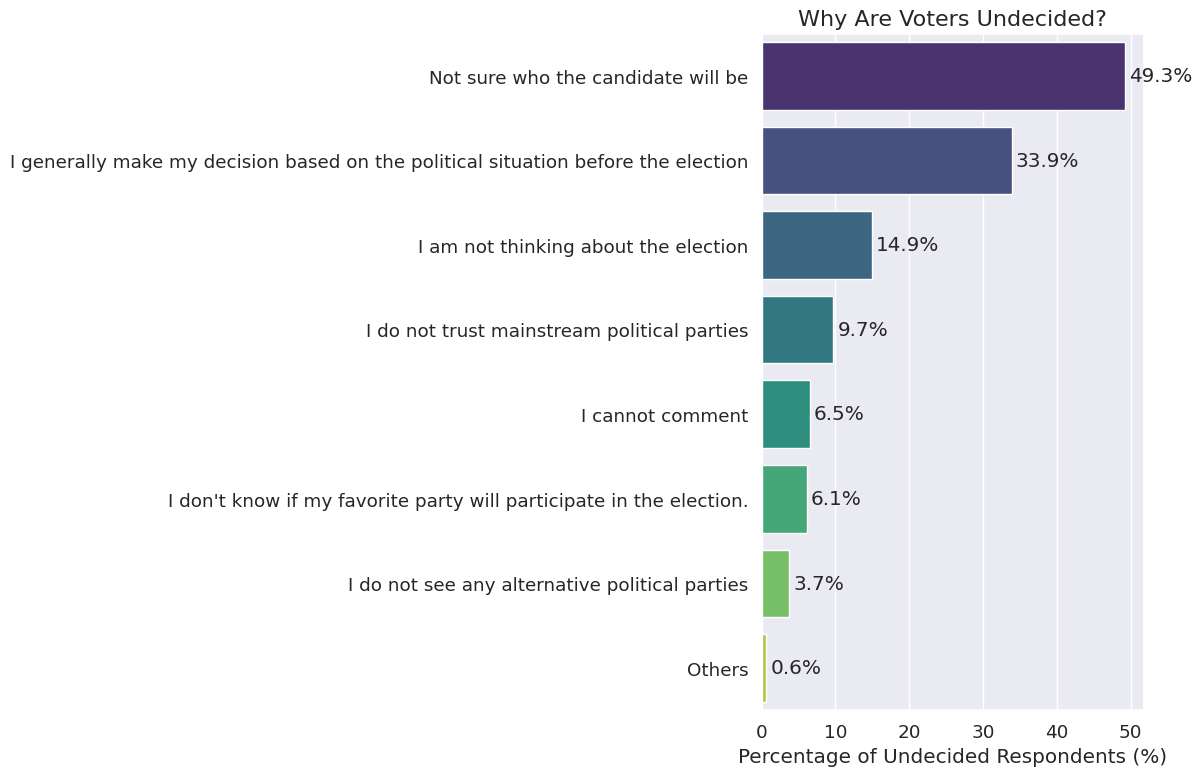

In [16]:
# --- Chart 3: Reasons for Being Undecided ---
# This data is from Table 18 in the source paper, so we'll create the DataFrame manually.

undecided_reasons_data = {
    'Reason': [
        "Not sure who the candidate will be",
        "I generally make my decision based on the political situation before the election",
        "I am not thinking about the election",
        "I do not trust mainstream political parties",
        "I cannot comment",
        "I don't know if my favorite party will participate in the election.",
        "I do not see any alternative political parties",
        "Others"
    ],
    'Percentage': [49.3, 33.9, 14.9, 9.7, 6.5, 6.1, 3.7, 0.6]
}
undecided_reasons_df = pd.DataFrame(undecided_reasons_data).sort_values('Percentage', ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Percentage', y='Reason', data=undecided_reasons_df, palette='viridis')

ax.set_title('Why Are Voters Undecided?', fontsize=16)
ax.set_xlabel('Percentage of Undecided Respondents (%)')
ax.set_ylabel('')

# Add percentage labels to the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.savefig("Reasons for Being Undecided.png")
plt.show()

## 9. Overall Voting Preferences


This is the core finding of the poll. This bar chart displays the current voting preferences among decided voters, showing the percentage of support for each major political party if the election were held today. The results show the 

BNP leading with **41.69%**, followed by Bangladesh Jamaat-e-Islami with **31.56%**.




In [17]:
print(voting_preferences_by_age.head())

             age_group                            party  percentage  \
0  Gen Z (18-28 years)                              BNP        35.5   
1  Gen Z (18-28 years)       Bangladesh Jamaat E Islami        34.2   
2  Gen Z (18-28 years)                     Awami League        11.3   
3  Gen Z (18-28 years)  Student led new political party        10.1   
4  Gen Z (18-28 years)                 Others (specify)         3.3   

   sample_size  
0         1331  
1         1331  
2         1331  
3         1331  
4         1331  


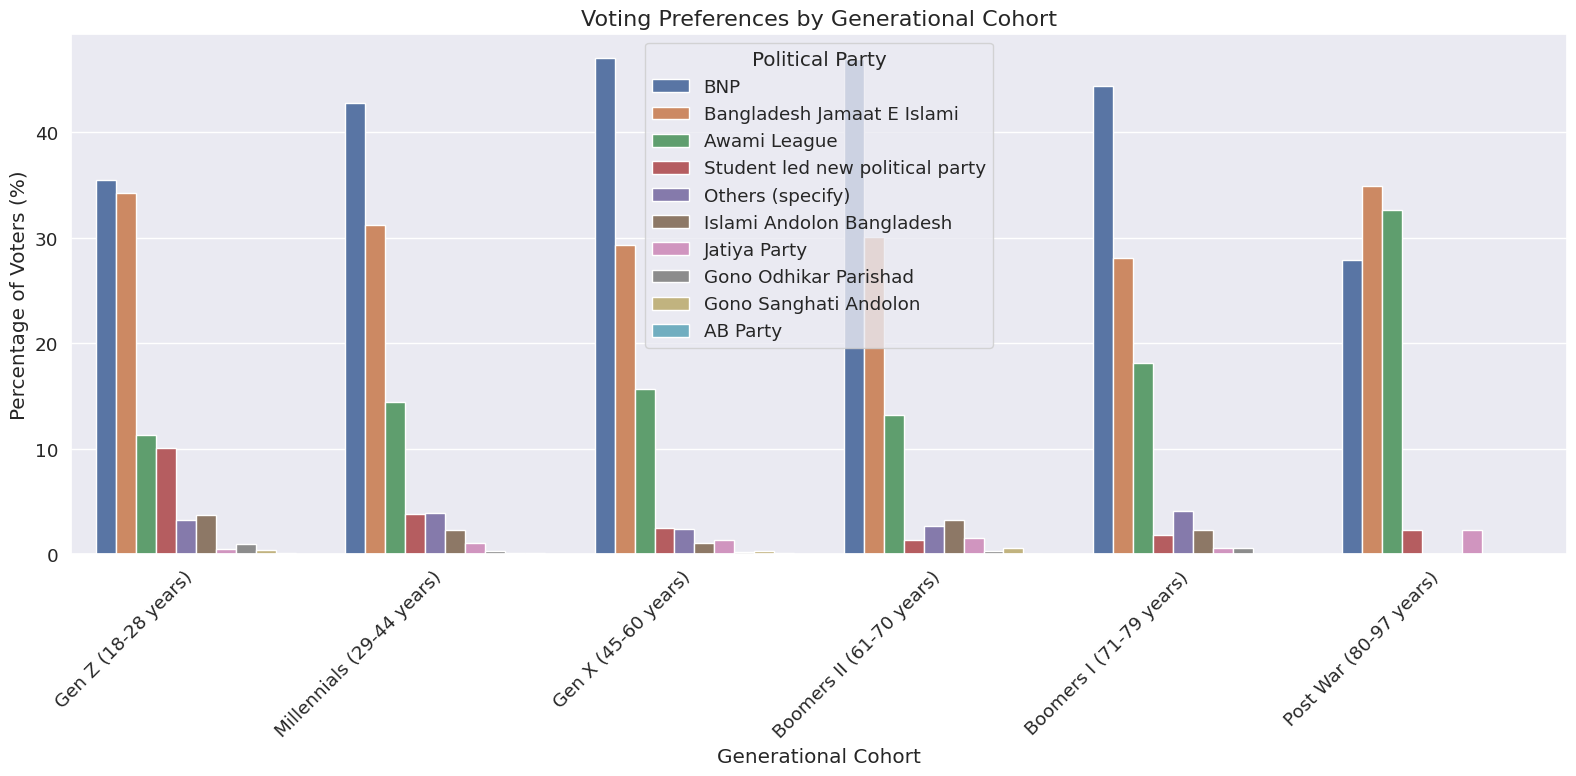

In [18]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x='age_group',  
    y='percentage',
    hue='party',
    data=voting_preferences_by_age,
    palette='deep'
)

ax.set_title('Voting Preferences by Generational Cohort', fontsize=16)
ax.set_xlabel('Generational Cohort') # More descriptive label
ax.set_ylabel('Percentage of Voters (%)')
plt.legend(title='Political Party')
plt.xticks(rotation=45, ha='right') # ha='right' aligns the rotated labels better
plt.tight_layout()
plt.savefig("Voting Preferences by Generation.png")
plt.show()


## 10. Deep Dive: Preferences by Generation & Location


Here, we analyze how party support differs across demographic groups. This reveals the coalitions of each party, highlighting that the 

Student-led party is a primarily urban (8.9%) and Gen Z (10.1%) phenomenon, while the main opposition parties like BNP and Jamaat-e-Islami have stronger bases in rural areas.

In [19]:
print(voting_preferences_by_gender_location.head())

  demographic_category subcategory                            party  \
0               Gender        Male                              BNP   
1               Gender        Male       Bangladesh Jamaat E Islami   
2               Gender        Male                     Awami League   
3               Gender        Male  Student led new political party   
4               Gender        Male                 Others (specify)   

   percentage  sample_size  
0        42.4         2729  
1        32.6         2729  
2        13.1         2729  
3         4.9         2729  
4         2.2         2729  


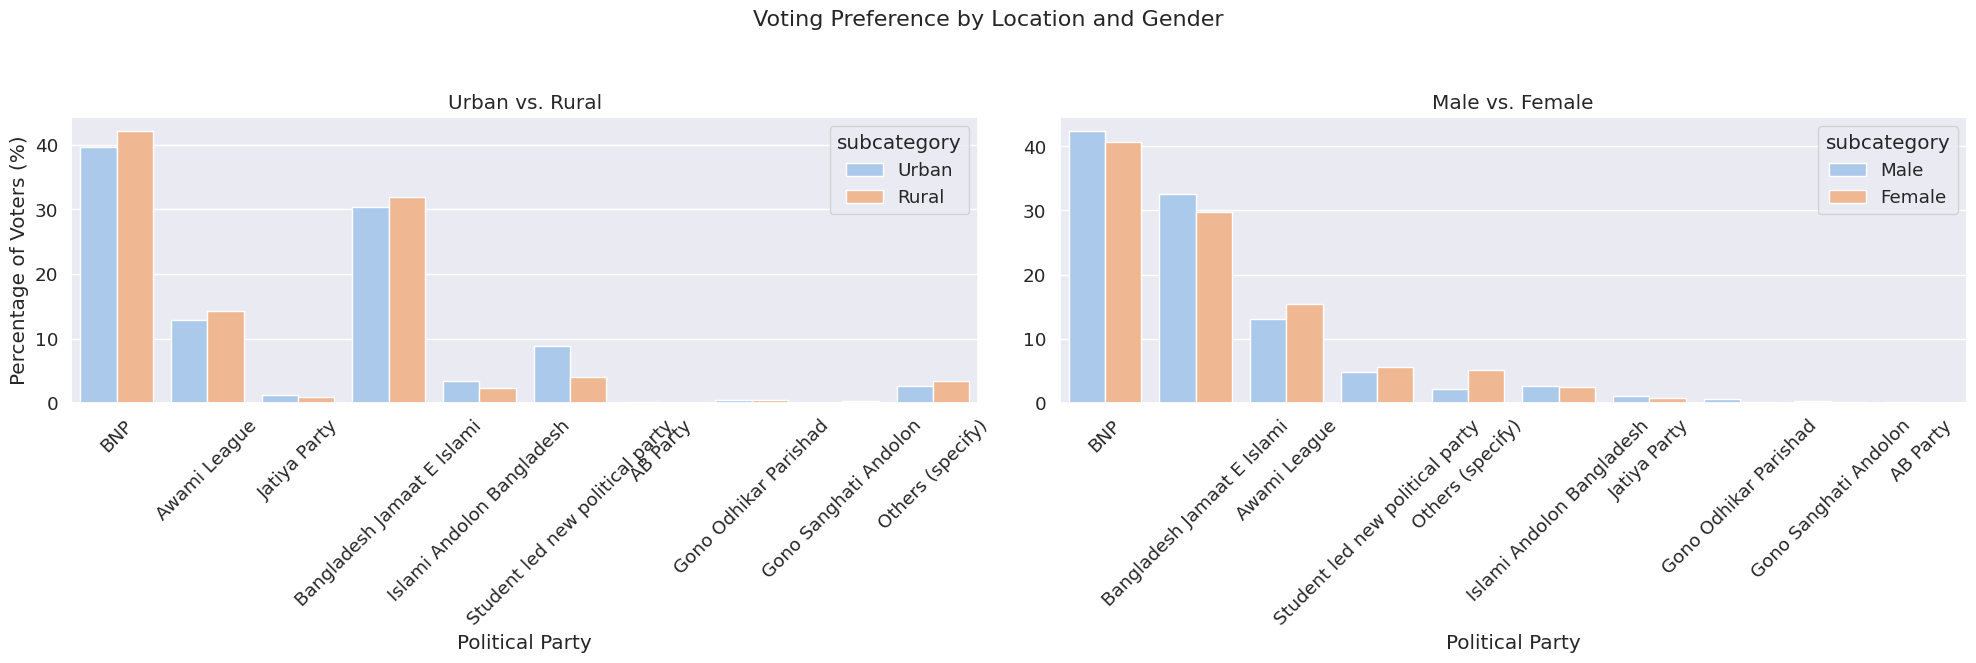

In [20]:
# Create two separate plots for clarity
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle('Voting Preference by Location and Gender', fontsize=16)


# --- Corrected Plot for Urban vs. Rural ---
# Filter on the 'demographic_category' column
location_data = voting_preferences_by_gender_location[voting_preferences_by_gender_location['demographic_category'] == 'Location']
# Use 'subcategory' for the hue to separate Urban/Rural bars
sns.barplot(x='party', y='percentage', hue='subcategory', data=location_data, ax=ax[0], palette='pastel')
ax[0].set_title('Urban vs. Rural')
ax[0].set_xlabel('Political Party')
ax[0].set_ylabel('Percentage of Voters (%)')
ax[0].tick_params(axis='x', rotation=45)


# --- Corrected Plot for Male vs. Female ---
# Filter on the 'demographic_category' column
gender_data = voting_preferences_by_gender_location[voting_preferences_by_gender_location['demographic_category'] == 'Gender']
# Use 'subcategory' for the hue to separate Male/Female bars
sns.barplot(x='party', y='percentage', hue='subcategory', data=gender_data, ax=ax[1], palette='pastel')
ax[1].set_title('Male vs. Female')
ax[1].set_xlabel('Political Party')
ax[1].set_ylabel('') # Hide y-label
ax[1].tick_params(axis='x', rotation=45)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Voting Preferences by Location and Gender.png")
plt.show()


## 11. Deep Dive: Regional Strongholds by Division

To understand the geographical landscape, we use a heatmap to visualize party support in each of Bangladesh's eight divisions. This allows us to quickly identify the regional strongholds, showing that while 

BNP leads in **six divisions**, Jamaat-e-Islami is the dominant party in **Khulna and Rangpur.**

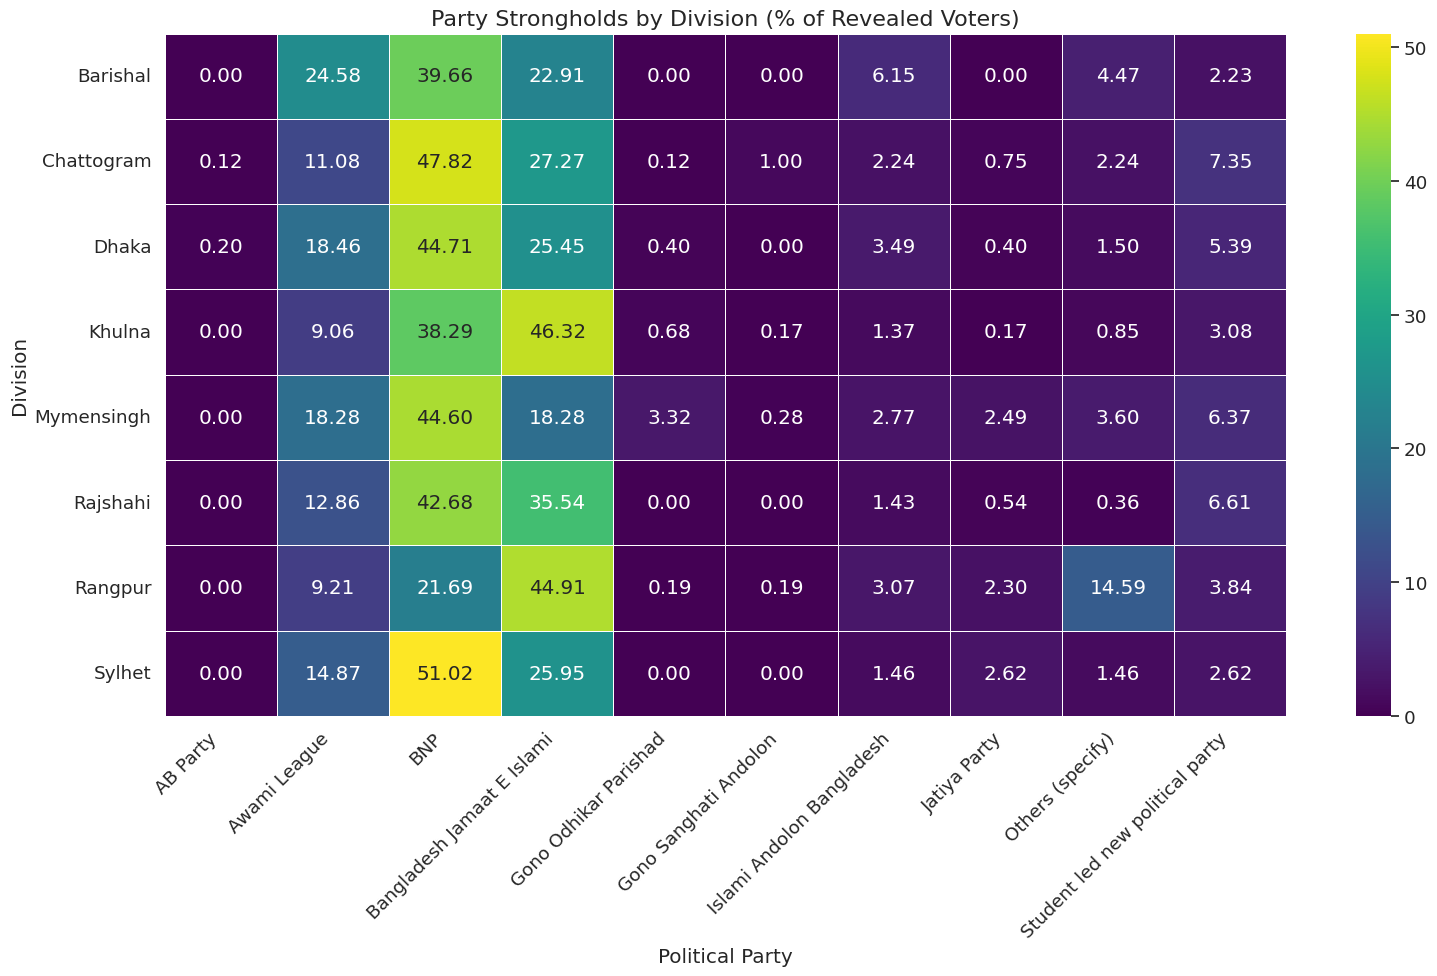

In [21]:
# Pivot the data to create a matrix suitable for a heatmap
# We'll set divisions as the rows (index), parties as the columns, and vote percentage as the values
heatmap_data = voting_preferences_by_division.pivot(index='division', columns='party', values='percentage')

# Fill any missing values with 0 (for parties with no votes in a division)
heatmap_data = heatmap_data.fillna(0)


# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(
    heatmap_data,
    annot=True,  # Show the percentage values in each cell
    fmt=".2f",   # Format the numbers to two decimal places
    cmap='viridis', # A visually appealing color map
    linewidths=.5
)

plt.title('Party Strongholds by Division (% of Revealed Voters)', fontsize=16)
plt.xlabel('Political Party')
plt.ylabel('Division')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Voting Preferences by Division.png")
plt.show()


## 12. Election Timing & Polling Trends


Finally, we analyze voter sentiment on election timing and the political momentum of the parties. The data shows a clear desire for a swift election, with 

58.1% of voters wanting it by the end of 2025. A comparison with previous results reveals that both 

BNP and Jamaat-e-Islami have significantly gained support, while the Student-led party's initial surge has declined.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


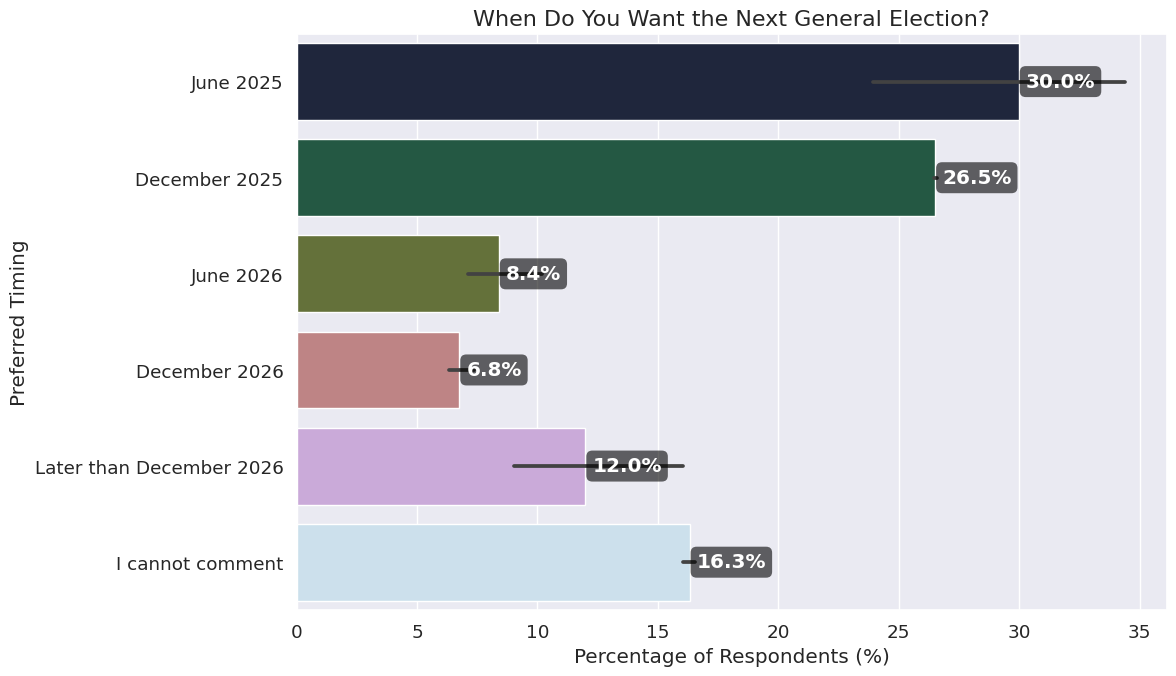

In [22]:
# Sort by a logical order
timing_order = ["June 2025", "December 2025", "June 2026", "December 2026", "Later than December 2026", "I cannot comment"]
election_timing_preferences['preference'] = pd.Categorical(election_timing_preferences['preference'], categories=timing_order, ordered=True)
election_timing_preferences = election_timing_preferences.sort_values('preference')

# Create a bar chart
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='percentage', y='preference', data=election_timing_preferences, palette='cubehelix')

ax.set_title('When Do You Want the Next General Election?', fontsize=16)
ax.set_xlabel('Percentage of Respondents (%)')
ax.set_ylabel('Preferred Timing')

# Add labels with a background for high visibility
ax.bar_label(
    ax.containers[0],
    fmt='%.1f%%',
    padding=5,
    color='white',
    fontweight='bold',
    # --- THIS IS THE FIX ---
    bbox=dict(boxstyle="round,pad=0.3", facecolor="black", alpha=0.6, edgecolor='none')
)

plt.tight_layout()
plt.savefig("When Do Voters Want the Next Election?.png")
plt.show()

In [23]:
print(previous_vs_current_results.head())

                      metric  previous_result  updated_result  change
0           Undecided Voters            34.00           29.00   -5.00
1             BNP Vote Share            33.87           41.69    7.82
2  Jamaat-e-Islam Vote Share            22.58           31.56    8.98
3    Awami League Vote Share             8.06           13.96    5.90
4   Student Party Vote Share            16.13            5.14  -10.99


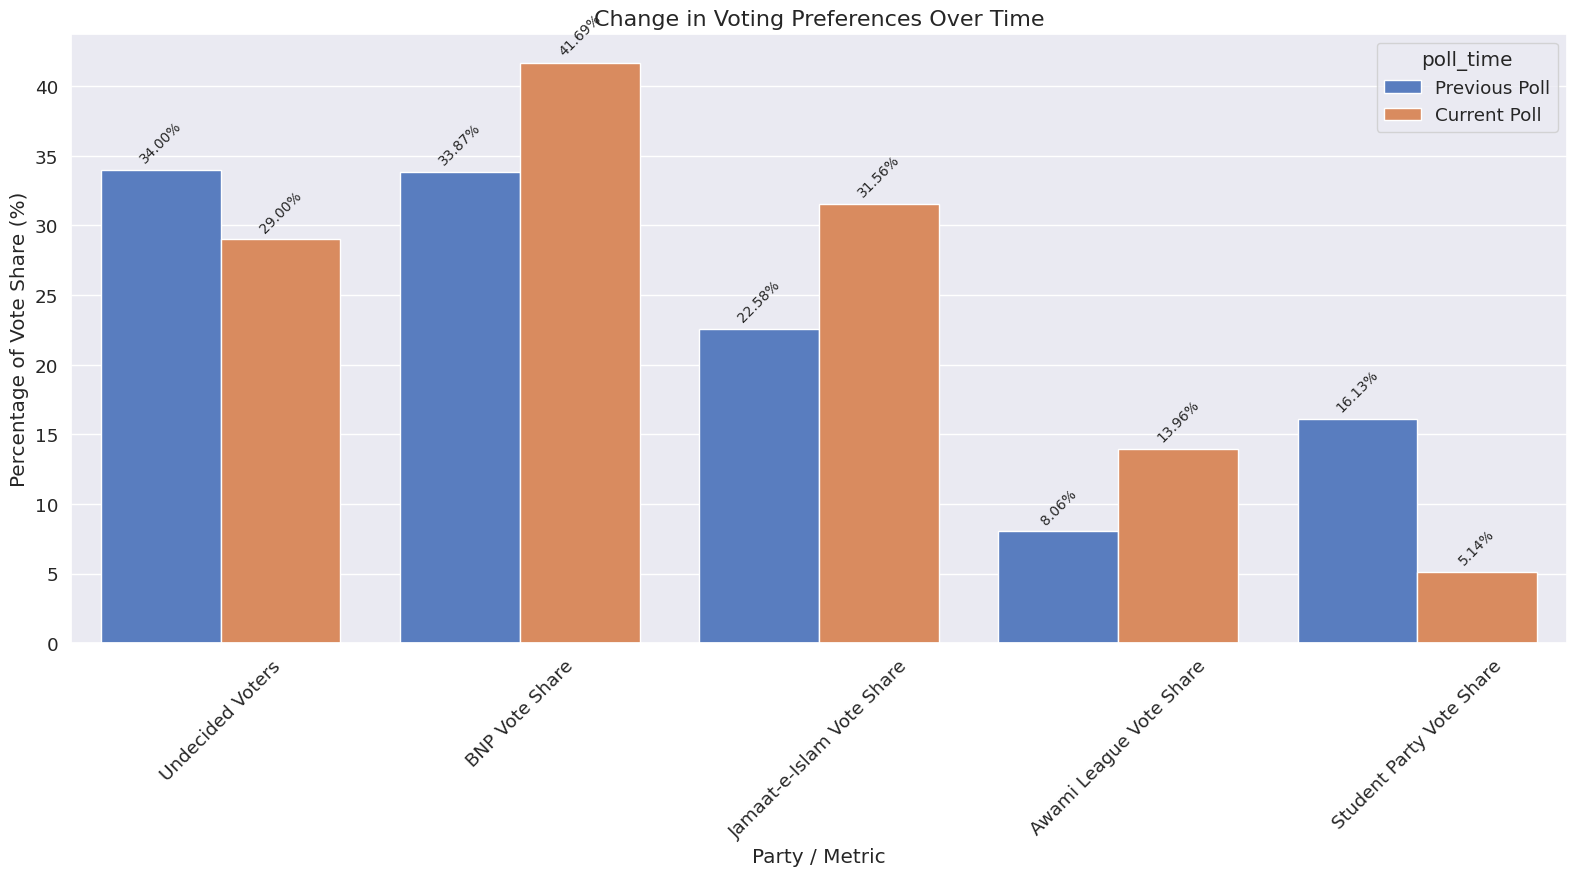

In [24]:
# --- STEP 1: Reshape the data from the "wide" format to the "long" format ---
# This is the step I failed to explain properly.
df_long = pd.melt(
    previous_vs_current_results,
    id_vars=['metric'],                             # Column to keep as the identifier
    value_vars=['previous_result', 'updated_result'], # Columns to "unpivot" or stack
    var_name='poll_time',                           # Name for the new column that says where the value came from
    value_name='percentage'                         # Name for the new column that holds the actual numbers
)

# This part just makes the legend in the plot look nicer
df_long['poll_time'] = df_long['poll_time'].replace({
    'previous_result': 'Previous Poll',
    'updated_result': 'Current Poll'
})


# --- STEP 2: Create the plot using our newly reshaped data ---
plt.figure(figsize=(16, 9))
ax = sns.barplot(
    x='metric',       # The column with party names
    y='percentage',   # The column with the numeric values
    hue='poll_time',  # The column that separates the bars by color
    data=df_long,
    palette='muted'
)

ax.set_title('Change in Voting Preferences Over Time', fontsize=16)
ax.set_xlabel('Party / Metric')
ax.set_ylabel('Percentage of Vote Share (%)')
ax.tick_params(axis='x', rotation=45)

# Add readable labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=3, rotation=45, fontsize=10)

plt.tight_layout()
plt.savefig("How Have Poll Results Changed Over Time?.png")
plt.show()

## Conclusion

**Analysis Summary & Key Takeaways**

This comprehensive exploratory data analysis reveals a clear and compelling narrative of the Bangladeshi electorate.

The political landscape is defined by a young, rural populace that is deeply concerned with economic stability—primarily price hikes and employment. Widespread dissatisfaction with the interim government's performance on these key issues has fueled a strong desire for change, benefiting opposition parties.

If the election were held today, the BNP would emerge as the frontrunner, with a broad base of support across most divisions. Jamaat-e-Islami follows as a strong second, demonstrating impressive momentum and dominant strongholds in the Khulna and Rangpur divisions. **The ruling Awami League retains a core base of older voters, while a new Student-led party has carved out a niche among urban youth, acting as a potential wild card**.

Ultimately, the election appears to hinge on the large and influential bloc of undecided voters (29.4%). This group—who are predominantly young, urban, and female—remains pragmatic, waiting for candidate announcements and the evolving political situation to make their final choice. Their decision will likely determine the final outcome of the election.

Source Paper Survey: [People’s Election Pulse: Feb- March, 2025
A Survey of INNOVISION Consulting](https://innovision-bd.com/wp-content/uploads/2025/03/250313_Innovision-National-Poll__English_Official.pdf)